In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 


In [16]:
stocks = ['MMM','JPM','CVX']
weights = [0.3,0.5, 0.2]
init_invest = 1000
recurring_deposit = 50
# 1 = yearly, 4 = quarterly, 12 = monthly, 0 = never
recurring_rate = 12

start_prices = [140.75, 113.42, 147.32]
start_ann_div_per_share = [5.88, 4.00, 5.68]
div_freq = [4, 4, 4]
div_cagr = [10.99, 15.41, 5.07]
stock_cagr = [7.50, 4.44, 7.02]
per = '5y'
init_shares = []
forcast_length_in_months = 12*50
dataframes = []

In [17]:
for i in range(len(stocks)):
    init_shares_stock = (init_invest * weights[i]) / start_prices[i]
    init_shares.append(init_shares_stock) 
    d = {
            "year" : 1, 
            "month" : 1, 
            "deposit" : init_invest*weights[i],
            'price' : start_prices[i],
            "purchased shares" : init_shares[i],
            'dividend' : 0,
            'dividend shares' : 0 ,
            'Cumlative Shares' : init_shares[i],
            'Ann. Div/Share' : start_ann_div_per_share[i],
            'Value of Shares' : init_shares[i] * start_prices[i]
        }
    dataframes.append(pd.DataFrame(d, index=[0]))
    dataframes[-1].name = stocks[i]

In [28]:
totals = {
        "year" : 1, 
        "month" : 1, 
        "deposit" : init_invest,
        "purchased shares" : sum(init_shares),
        'dividend' : 0,
        'dividend shares' : 0 ,
        'Cumlative Shares' : sum(init_shares),
        'Ann. Div/Share' : sum(start_ann_div_per_share),
        'Value of Shares' : np.dot(init_shares, start_prices) 
}

In [18]:
fidx = 0
for frame in dataframes:
    for i in range(1, forcast_length_in_months):
        # determine the year value
        if frame.iloc[i-1]['month'] == 12: 
            current_year = frame.iloc[i-1]['year'] + 1
        else:
            current_year = frame.iloc[i-1]['year']

        # determine the month 
        if frame.iloc[i-1]['month'] != 12: 
            current_month = frame.iloc[i-1]['month'] + 1
        else:
            current_month = 1

        # Determine Deposit 
        if np.mod(current_month, 12/recurring_rate) == 0: 
            # we are in a deposit month 
            deposit = recurring_deposit * weights[fidx]
        else: 
            deposit = 0 
        
        # determine the price 
        price = frame.iloc[i-1]['price'] + frame.iloc[i-1]['price'] * ((stock_cagr[fidx]/100)/12)

        purchased_shares = deposit / price 

        if np.mod(current_month, 12/div_freq[fidx]) == 0: 
            div = frame.iloc[i-1]['Cumlative Shares'] * frame.iloc[i-1]['Ann. Div/Share']/(div_freq[fidx])
        else: 
            div = 0 

        div_shares = div/price 

        cum_shares = div_shares + purchased_shares + frame.iloc[i-1]['Cumlative Shares']

        if frame.iloc[i-1]['month'] == 12: 
            #update div
            new_div = frame.iloc[i-1]['Ann. Div/Share'] + frame.iloc[i-1]['Ann. Div/Share'] * (div_cagr[fidx]/100)
        else: 
            new_div = frame.iloc[i-1]['Ann. Div/Share']

        value = cum_shares * price

        row = [current_year, current_month, deposit, price, purchased_shares, div, div_shares, cum_shares, new_div, value]

        frame.loc[len(frame)] = row
    fidx = fidx + 1
         



    

In [31]:
totals = pd.DataFrame(totals, index=[0])
for r in range(1, len( dataframes[0])):
    
     
    deposit = 0
    purchased = 0
    divs = 0
    div_shares = 0
    shares = 0
    divPerShare_ann = 0
    value = 0

    if frame.iloc[r-1]['month'] == 12: 
            current_year = frame.iloc[r-1]['year'] + 1
    else:
            current_year = frame.iloc[r-1]['year']

        # determine the month 
    if frame.iloc[i-1]['month'] != 12: 
            current_month = frame.iloc[r-1]['month'] + 1
    else:
            current_month = 1
    
    for frame in dataframes:
        deposit = deposit + frame.iloc[r]['deposit']
        purchased = purchased + frame.iloc[r]['purchased shares']
        divs = divs + frame.iloc[r]['dividend']
        div_shares = div_shares + frame.iloc[r]['dividend shares']
        shares = shares + frame.iloc[r]['Cumlative Shares']
        divPerShare_ann = divPerShare_ann + frame.iloc[r]['Ann. Div/Share']
        value = value + frame.iloc[r]['Value of Shares']
    row = [current_year, current_month, deposit, purchased, divs, div_shares, shares, divPerShare_ann, value]
    totals.loc[len(totals)] = row



In [33]:
import matplotlib.pyplot as plt

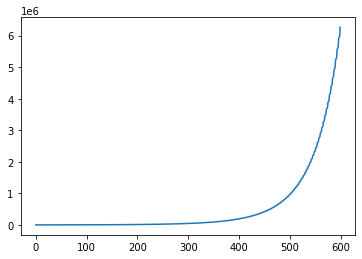

In [40]:
plt.plot(dataframes[0]['Value of Shares'][:])